In [245]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

## 1. How do you handle duplicate values in a dataset in Python?

#### 1）use set to remove duplication in list

In [7]:
dup_list = [('A','B','C'),'A','AB',('A','B','C')]
dup_list

[('A', 'B', 'C'), 'A', 'AB', ('A', 'B', 'C')]

In [8]:
dup_list=set(dup_list)
dup_list=list(dup_list)
dup_list

['AB', 'A', ('A', 'B', 'C')]

#### 2) use function to remove duplication in a dataframe

In [28]:
dup_df=pd.DataFrame({'id':['001','002','003','001','001'],
                   'name':['张三','李四','王五','张三','张三'],
                   'item':['apple','orange','grape','orange','apple'],
                   'cost':['2','3','4','5','2']})
dup_df = dup_df.set_index('id')
dup_df

,cost,item,name
id,,,
001,2,apple,张三
002,3,orange,李四
003,4,grape,王五
001,5,orange,张三
001,2,apple,张三


In [31]:
dup_df = dup_df.drop_duplicates()
dup_df

,cost,item,name
id,,,
001,2,apple,张三
002,3,orange,李四
003,4,grape,王五
001,5,orange,张三


## 2. You are given two tables - friend_request and request_accepted. Friend_request contains requester_id, time and sent_to_id and request_accepted table contains time, acceptor_id and requestor_id. How will you determine the overall acceptance rate of requests? 

#### 1) SQL
#### SELECT CAST(SUM (CASE sent_to_id WHEN NULL THEN 0 ELSE 1 END) as float)/COUNT(re.requester_id)
#### FROM friend_request as re LEFT JOIN request_accepted as ac
#### ON re.sent_to_id = ac.acceptor_id AND re.requester_id = ac.requester_id

#### 2) Python

In [90]:
friend_request = pd.DataFrame({'requester_id':['001','002','003'],
                               'time':['2018-04-02','2018-04-03','2018-04-03'],
                               'sent_to_id':['005','006','007']})
request_accepted = pd.DataFrame({'time':['2018-04-02','2018-04-03'],
                                 'acceptor_id':['005','007'],
                                 'requester_id':['001','003']})
friend_request

,requester_id,sent_to_id,time
0,001,005,2018-04-02
1,002,006,2018-04-03
2,003,007,2018-04-03


In [91]:
request_accepted

,acceptor_id,requester_id,time
0,005,001,2018-04-02
1,007,003,2018-04-03


In [88]:
# overall acceptance rate = total acceptance/total request

In [92]:
temp_table=pd.merge(friend_request,request_accepted,left_on=["sent_to_id","requester_id"],
                    right_on=["acceptor_id","requester_id"],how="left")
temp_table

,requester_id,sent_to_id,time_x,acceptor_id,time_y
0,001,005,2018-04-02,005,2018-04-02
1,002,006,2018-04-03,NaN,NaN
2,003,007,2018-04-03,007,2018-04-03


In [93]:
total_acceptance= temp_table["acceptor_id"].notnull().sum()
total_request= temp_table["requester_id"].notnull().sum()

In [94]:
acceptance_rate = total_acceptance/total_request
acceptance_rate

0.6666666666666666

## 3. “Issuer” of a credit card are companies like Visa, Mastercard, American Express. Now we know the following rules:

#### CC number starts with: '4'
#### CC len : 16
#### Issuer: VISA

#### CC number starts with: '34', '37'
#### CC len : 15
#### Issuer : AMEX

#### CC number starts with: '36'
#### CC len : 14
#### Issuer : Diners Club

#### Credit card number starts with
#### '4026', '417500', '4405', '4508', '4844',
#### '4913', '4917'
#### CC len : 16
#### Issuer : VISAELECTRON

#### Now write Python scripts to identify the issuer of the following credit card numbers:

#### '4175004175004172' 
#### '4917491749174917'
#### '346416800707698'
#### '376416800707698'
#### '37641680070769832112'
#### '36641680070769'
#### '54545641680070769’ 

In [87]:
card_numbers = pd.DataFrame({"number":['4175004175004172','4917491749174917','346416800707698','376416800707698'
,'37641680070769832112','36641680070769','54545641680070769']})
card_numbers                

,number
0,4175004175004172
1,4917491749174917
2,346416800707698
3,376416800707698
4,37641680070769832112
5,36641680070769
6,54545641680070769


In [96]:
issuer = []
for x in card_numbers['number']:
    if len(x)== 16 and (x.startswith('4026') or x.startswith('417500') or x.startswith('4405') or x.startswith('4508') or x.startswith('4844') or x.startswith('4913') or x.startswith('4917')):
        issuer.append("VISAELECTRON")
    elif len(x) == 16 and x.startswith('4'):
        issuer.append("VISA")
    elif len(x) == 15 and (x.startswith('34') or x.startswith('37')):
        issuer.append("AMEX")
    elif len(x) == 14 and x.startswith('36'):
        issuer.append("Diners Club")
    else:
        issuer.append('')
issuer

['VISAELECTRON', 'VISAELECTRON', 'AMEX', 'AMEX', '', 'Diners Club', '']

In [97]:
card_numbers['issuer'] = issuer
card_numbers

,number,issuer
0,4175004175004172,VISAELECTRON
1,4917491749174917,VISAELECTRON
2,346416800707698,AMEX
3,376416800707698,AMEX
4,37641680070769832112,
5,36641680070769,Diners Club
6,54545641680070769,


## 4. Similarly to PrintDailyTimeSeries() in the sample code, write a Python function called PrintCumulativeTimeSeries(). Specifically:

### The function takes three inputs:
### experiment_id
### country
### vertical

### The function produces two outputs:
### A time series chart showing the cumulative uplift (hint: search for cumsum)
### Print out the cumulative % uplift on revenue, experiment vs. control. Hint: (red - blue) / blue %


In [104]:
sales_data = pd.read_csv("BA501_python_data.csv")
sales_data.head()

,country,date,experiment_id,order_id,spend_usd,user_id,vertical
0,JP,20170402,12624548,5813140433216629693,16.138855,5006730028073359543,ANDROID_APPS
1,US,20170403,12624549,16333056276711034931,9.990000,5938685669571545259,ANDROID_APPS
2,JP,20170404,12624548,11227119161741298366,19.887087,17623708458399141713,ANDROID_APPS
3,US,20170403,12624548,11927299833124210932,19.990000,18042812344456618148,ANDROID_APPS
4,JP,20170403,12624549,11644727017708872749,88.220093,4325104700699531031,ANDROID_APPS


In [124]:
vertical=pd.unique(sales_data["vertical"])
country = pd.unique(sales_data["country"])

In [246]:
def PrintCumulativeTimeSeries(experiment_id,country,vertical):
    #select data
    #temp_data = sales_data[['date','spend_usd','experiment_id']][(sales_data.country==country) & (sales_data.vertical == vertical)]
    red_ex=pd.unique(experiment_id)[0]
    blue_ex=pd.unique(experiment_id)[1]
    red_data = sales_data[['date','spend_usd']][(sales_data.country==country) & (sales_data.vertical == vertical) & (sales_data.experiment_id==red_ex)]
    blue_data = sales_data[['date','spend_usd']][(sales_data.country==country) & (sales_data.vertical == vertical) & (sales_data.experiment_id==blue_ex)]
    #get the cumulated time series sum
    red_sum = red_data.groupby('date')['spend_usd'].sum()
    blue_sum = blue_data.groupby('date')['spend_usd'].sum()
    red_cumsum = pd.DataFrame(np.cumsum(red_sum))
    blue_cumsum = pd.DataFrame(np.cumsum(blue_sum))
    red_cumsum=red_cumsum.reset_index()
    blue_cumsum=blue_cumsum.reset_index()
    
    #plot 
    fig,ax = plt.subplots()
    ax.plot(red_cumsum['date'], red_cumsum['spend_usd'],color="red",label = "experiment")
    ax.plot(blue_cumsum['date'],blue_cumsum['spend_usd'],color="blue",label = "control")
    ax.set_ylabel("Cumulative spend")
    ax.set_title("Red vs. Blue")
    ax.legend()
    # % uplift on revenue
    
    #red_cumsum=red_cumsum.reset_index()
    red_revenue=red_cumsum['spend_usd'][len(red_cumsum)-1]
    #blue_cumsum=blue_cumsum.reset_index()
    blue_revenue=blue_cumsum['spend_usd'][len(blue_cumsum)-1]
    
    rate=round(((red_revenue-blue_revenue)/blue_revenue),4)
    print('Cumulative % uplift on revenue:')
    print(rate)

Cumulative % uplift on revenue:
-0.0269


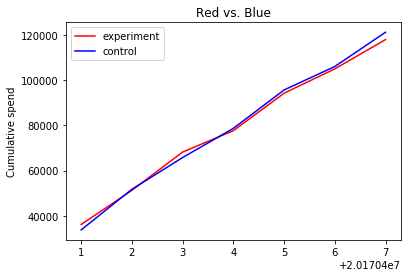

In [247]:
PrintCumulativeTimeSeries(sales_data['experiment_id'],country[0],vertical[0])